In [1]:
!pip install tensorflow==1.15

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import tensorflow as tf
from tensorflow.python.ops import rnn, rnn_cell
import numpy as np 

from tensorflow.examples.tutorials.mnist import input_data

import matplotlib.pyplot as plt

mnist = input_data.read_data_sets('MNIST_data', one_hot=True) #call mnist function

learningRate = 8e-3 # 1e-3
trainingIters = 80000 # 100000
batchSize = 128
displayStep = 10

nInput = 28 #we want the input to take the 28 pixels
nSteps = 28 #every 28
# nHidden = 128 # 64, 256 #number of neurons for the RNN
nClasses = 10 #this is MNIST so you know

x = tf.placeholder('float', [None, nSteps, nInput])
y = tf.placeholder('float', [None, nClasses])

# weights = {
# 	'out': tf.Variable(tf.random_normal([nHidden, nClasses]))
# }

# biases = {
# 	'out': tf.Variable(tf.random_normal([nClasses]))
# }

def RNN(x, weights, biases, nHidden, model):
	x = tf.transpose(x, [1,0,2])
	x = tf.reshape(x, [-1, nInput])
	x = tf.split(x, nSteps, 0) #configuring so you can get it as needed for the 28 pixels

	if model == 'lstm': #find which lstm to use in the documentation
		lstmCell =  tf.contrib.rnn.LSTMCell(nHidden)
		outputs, states = tf.contrib.rnn.static_rnn(lstmCell, x, dtype = tf.float32) #for the lstm where to get the output and hidden state 
	elif model == 'gru':
		gruCell = tf.contrib.rnn.GRUCell(nHidden)
		outputs, states = tf.contrib.rnn.static_rnn(gruCell, x, dtype = tf.float32) #for the gru where to get the output and hidden state 
	elif model == 'rnn':
		rnnCell = tf.contrib.rnn.BasicRNNCell(nHidden)
		outputs, states = tf.contrib.rnn.static_rnn(rnnCell, x, dtype = tf.float32) #for the rnn where to get the output and hidden state 

	return tf.matmul(outputs[-1], weights['out'])+ biases['out']


def train(model, nHidden):
	weights = {
		'out': tf.Variable(tf.random_normal([nHidden, nClasses]))
	}

	biases = {
		'out': tf.Variable(tf.random_normal([nClasses]))
	}

	pred = RNN(x, weights, biases, nHidden, model)
 
	#optimization
	#create the cost, optimization, evaluation, and accuracy
	#for the cost softmax_cross_entropy_with_logits seems really good
	cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y, logits = pred))
	optimizer = tf.train.AdamOptimizer(learningRate).minimize(cost)

	correctPred = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
	accuracy = tf.reduce_mean(tf.cast(correctPred, tf.float32))
 
	init = tf.initialize_all_variables()
 
	loss_lst = []
	acc_lst = []
	with tf.Session() as sess:
		sess.run(init)
		step = 1

		while step * batchSize < trainingIters:
			batchX, batchY = mnist.train.next_batch(batchSize)  # mnist has a way to get the next batch
			batchX = batchX.reshape((batchSize, nSteps, nInput))

			sess.run(optimizer, feed_dict = {x: batchX, y: batchY})
	 
			if step % displayStep == 0:
				acc = sess.run(accuracy, feed_dict = {x: batchX, y: batchY})
				loss = sess.run(cost, feed_dict = {x: batchX, y: batchY})
				acc_lst.append(acc)
				loss_lst.append(loss)
				print("Iter " + str(step * batchSize) + ", Minibatch Loss= " + \
				      "{:.6f}".format(loss) + ", Training Accuracy= " + \
				      "{:.5f}".format(acc))
			step += 1
		print('Optimization finished')

		testData = mnist.test.images.reshape((-1, nSteps, nInput))
		testLabel = mnist.test.labels
		test_accuracy = sess.run(accuracy, feed_dict = {x:testData, y:testLabel})
		print("{} Testing Accuracy: {}".format(model, test_accuracy) )
	sess.close()
	return acc_lst, loss_lst, test_accuracy

nHidden = 128 # 64, 128, 256 #number of neurons for the RNN
rnn_acc, rnn_loss, rnn_test = train('rnn', nHidden)
lstm_acc, lstm_loss,lstm_test = train('lstm', nHidden)
gru_acc, gru_loss,gru_test = train('gru', nHidden)

print('\nTest Accuracy: RNN:{}, LSTM:{},GRU :{}'.format(rnn_test, lstm_test, gru_test))


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.


Extracting MNIST_data/train-images-idx3-ubyte.gz


Instructions for updating:
Please use tf.data to implement this functionality.
Instructions for updating:
Please use tf.one_hot on tensors.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.SimpleRNNCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Instruction

Iter 1280, Minibatch Loss= 2.662620, Training Accuracy= 0.41406
Iter 2560, Minibatch Loss= 1.760155, Training Accuracy= 0.52344
Iter 3840, Minibatch Loss= 1.517333, Training Accuracy= 0.54688
Iter 5120, Minibatch Loss= 1.294335, Training Accuracy= 0.60156
Iter 6400, Minibatch Loss= 1.199914, Training Accuracy= 0.64062
Iter 7680, Minibatch Loss= 0.817165, Training Accuracy= 0.71094
Iter 8960, Minibatch Loss= 0.796925, Training Accuracy= 0.73438
Iter 10240, Minibatch Loss= 0.781201, Training Accuracy= 0.74219
Iter 11520, Minibatch Loss= 0.841797, Training Accuracy= 0.76562
Iter 12800, Minibatch Loss= 0.960530, Training Accuracy= 0.65625
Iter 14080, Minibatch Loss= 0.741186, Training Accuracy= 0.78125
Iter 15360, Minibatch Loss= 0.348930, Training Accuracy= 0.90625
Iter 16640, Minibatch Loss= 0.583029, Training Accuracy= 0.83594
Iter 17920, Minibatch Loss= 0.567211, Training Accuracy= 0.82812
Iter 19200, Minibatch Loss= 0.518218, Training Accuracy= 0.82812
Iter 20480, Minibatch Loss= 0.40

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.


rnn Testing Accuracy: 0.7497000098228455
Iter 1280, Minibatch Loss= 1.746131, Training Accuracy= 0.38281
Iter 2560, Minibatch Loss= 0.999784, Training Accuracy= 0.64844
Iter 3840, Minibatch Loss= 0.831485, Training Accuracy= 0.70312
Iter 5120, Minibatch Loss= 0.664781, Training Accuracy= 0.78125
Iter 6400, Minibatch Loss= 0.390397, Training Accuracy= 0.84375
Iter 7680, Minibatch Loss= 0.363032, Training Accuracy= 0.86719
Iter 8960, Minibatch Loss= 0.346797, Training Accuracy= 0.89844
Iter 10240, Minibatch Loss= 0.344102, Training Accuracy= 0.87500
Iter 11520, Minibatch Loss= 0.275916, Training Accuracy= 0.91406
Iter 12800, Minibatch Loss= 0.250252, Training Accuracy= 0.91406
Iter 14080, Minibatch Loss= 0.142079, Training Accuracy= 0.96094
Iter 15360, Minibatch Loss= 0.180992, Training Accuracy= 0.94531
Iter 16640, Minibatch Loss= 0.266999, Training Accuracy= 0.90625
Iter 17920, Minibatch Loss= 0.159624, Training Accuracy= 0.96094
Iter 19200, Minibatch Loss= 0.187755, Training Accuracy=

Instructions for updating:
This class is equivalent as tf.keras.layers.GRUCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


lstm Testing Accuracy: 0.9549999833106995
Iter 1280, Minibatch Loss= 1.454800, Training Accuracy= 0.52344
Iter 2560, Minibatch Loss= 0.899862, Training Accuracy= 0.71094
Iter 3840, Minibatch Loss= 0.696329, Training Accuracy= 0.76562
Iter 5120, Minibatch Loss= 0.464220, Training Accuracy= 0.83594
Iter 6400, Minibatch Loss= 0.448386, Training Accuracy= 0.89062
Iter 7680, Minibatch Loss= 0.383592, Training Accuracy= 0.88281
Iter 8960, Minibatch Loss= 0.214269, Training Accuracy= 0.93750
Iter 10240, Minibatch Loss= 0.165043, Training Accuracy= 0.96094
Iter 11520, Minibatch Loss= 0.165989, Training Accuracy= 0.94531
Iter 12800, Minibatch Loss= 0.294057, Training Accuracy= 0.92969
Iter 14080, Minibatch Loss= 0.113582, Training Accuracy= 0.96094
Iter 15360, Minibatch Loss= 0.230456, Training Accuracy= 0.92188
Iter 16640, Minibatch Loss= 0.157767, Training Accuracy= 0.96094
Iter 17920, Minibatch Loss= 0.174806, Training Accuracy= 0.94531
Iter 19200, Minibatch Loss= 0.147376, Training Accuracy

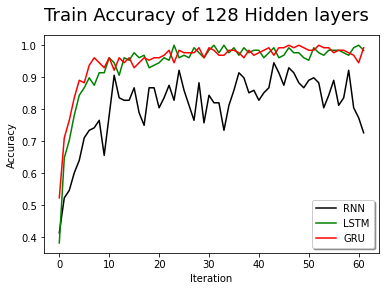

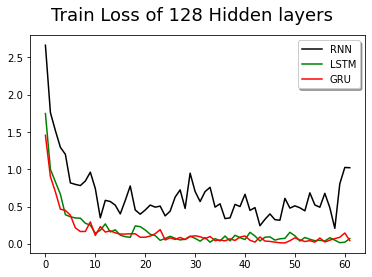

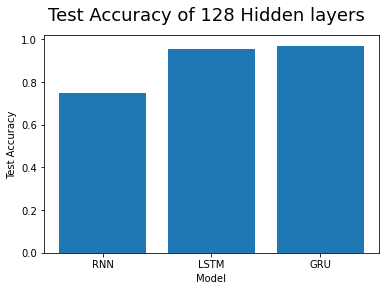

In [3]:
fig, ax = plt.subplots()
fig.suptitle('Train Accuracy of {} Hidden layers'.format(nHidden), fontsize = 18)
ax.plot(range(len(rnn_acc)),rnn_acc,'k',label = 'RNN')
ax.plot(range(len(lstm_acc)), lstm_acc, 'g', label = 'LSTM')
ax.plot(range(len(gru_acc)),gru_acc,'r',label = 'GRU')
ax.set(xlabel = 'Iteration', ylabel = 'Accuracy')
ax.legend(loc = 'lower right', shadow = True)
plt.show()
fig.savefig('acc_{}_hidden_layers.png'.format(nHidden))

fig, bx = plt.subplots()
fig.suptitle('Train Loss of {} Hidden layers'.format(nHidden), fontsize = 18)
bx.plot(range(len(rnn_loss)),rnn_loss,'k',label = 'RNN')
bx.plot(range(len(lstm_loss)), lstm_loss, 'g', label = 'LSTM')
bx.plot(range(len(gru_loss)),gru_loss,'r',label = 'GRU')
ax.set(xlabel = 'Iteration', ylabel = 'Loss')
bx.legend(loc = 'upper right', shadow = True)
plt.show()
fig.savefig('loss_{}_hidden_layers.png'.format(nHidden))

fig, cx = plt.subplots()
fig.suptitle('Test Accuracy of {} Hidden layers'.format(nHidden), fontsize = 18)
model_lst = ['RNN','LSTM','GRU']
test_acc_lst = [rnn_test, lstm_test, gru_test]
plt.bar(range(3), test_acc_lst, tick_label = model_lst)
cx.set(xlabel = 'Model', ylabel = 'Test Accuracy')
plt.show()
fig.savefig('test_acc_{}_hidden_layers.png'.format(nHidden))
